# Creating Panoramas using OpenCV

**Satya Mallick, LearnOpenCV.com**

In [1]:
# Import Libraries
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

##  <font style="color:black">Download Assets</font>

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB9.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

# Steps for Creating Panoramas

1. Find keypoints in all images
2. Find pairwise correspondences
2. Estimate pairwise Homographies
3. Refine Homographies
3. Stitch with Blending

# Steps for Creating Panoramas using OpenCV

In [6]:
# Read Images

imagefiles = glob.glob(f"opencv_bootcamp_assets_NB9/boat{os.sep}*") # Return a list of paths matching a pathname pattern.
imagefiles.sort() # sorts the list in ascending order


images = [] # inititate empty list, so that the images converted to RGB will stored here
for filename in imagefiles:
    img = cv2.imread(filename) # reading the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting to RGB
    images.append(img) # appending them to the list after convertion

num_images = len(images) # storing the number of images  in the list as num_images

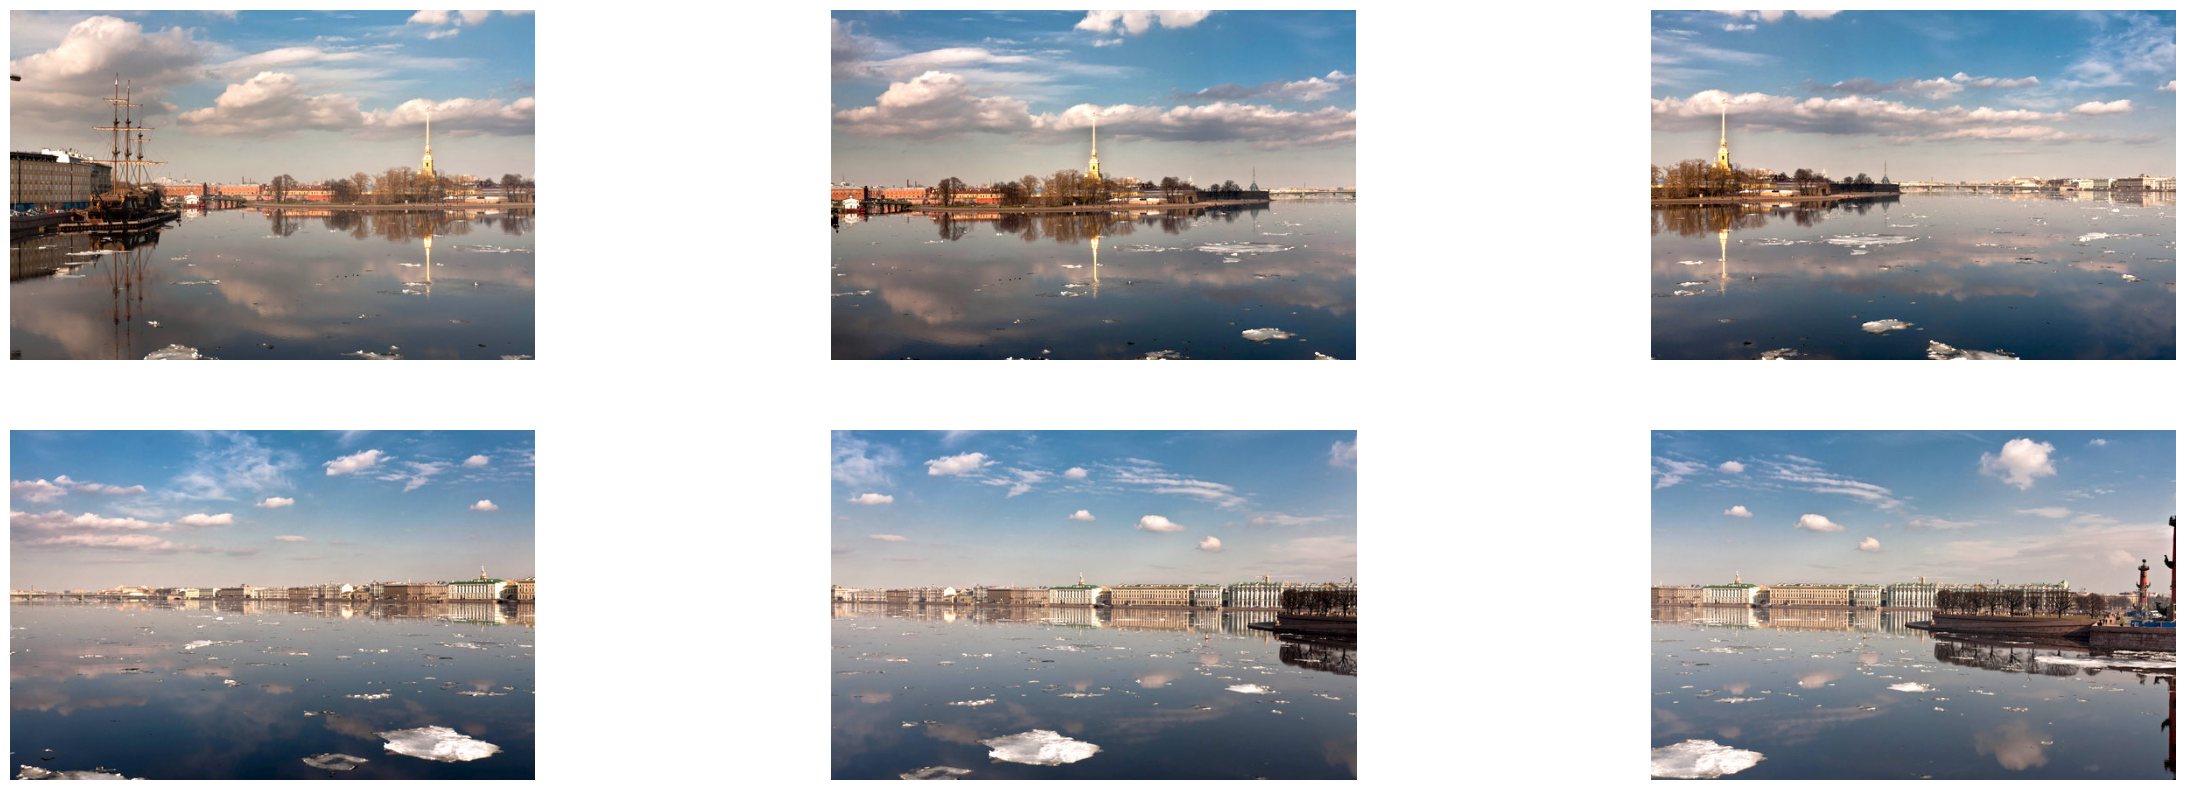

In [7]:
# Display Images
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images): # loop through each images and displays the image
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis("off")
    plt.imshow(images[i]) # displaying the image

Use the **sticher** class

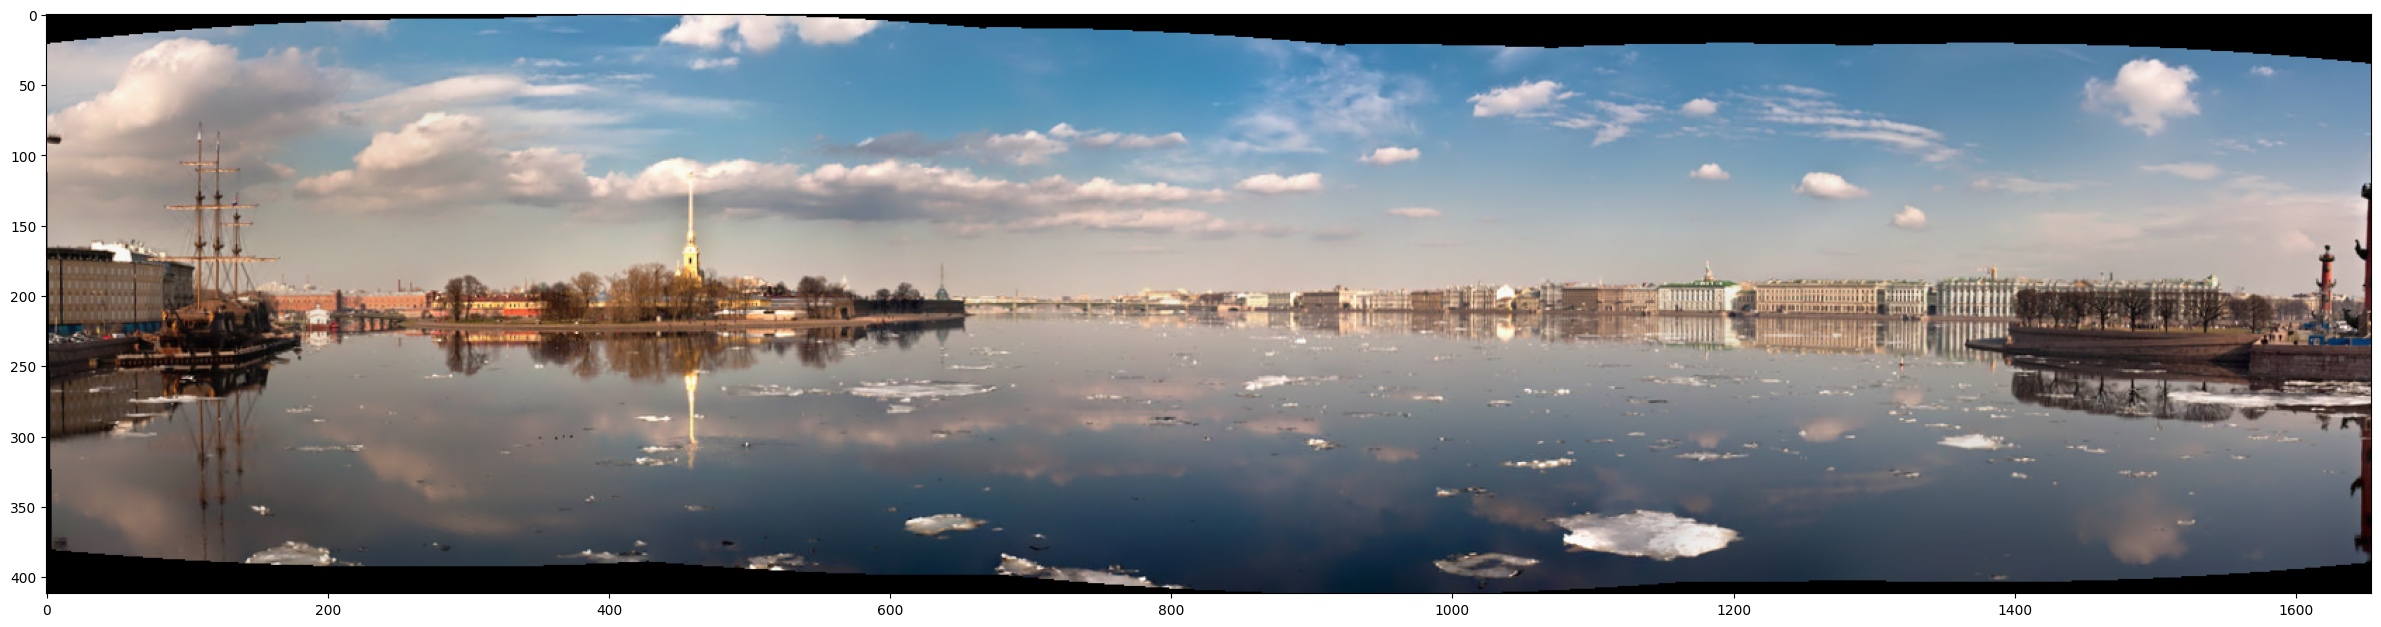

In [8]:
# Stitch Images
stitcher = cv2.Stitcher_create() # creates a sticher place to stitch
status, result = stitcher.stitch(images) # stitches the image

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)